# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
placement = pd.read_csv('Placement_Data_Full_Class.csv')
placement.head()
                   

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.00
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.00
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.00
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,nan
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.00


In [4]:
placement=placement.drop('sl_no',axis=1)

In [5]:
placement=placement.fillna(0,axis=1)

In [6]:
placement.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [7]:
print(placement.gender.value_counts())
print(placement.ssc_b.value_counts())
print(placement.hsc_b.value_counts())
print(placement.hsc_s.value_counts())
print(placement.degree_t.value_counts())
print(placement.workex.value_counts())
print(placement.specialisation.value_counts())
print(placement.status.value_counts())

M    139
F     76
Name: gender, dtype: int64
Central    116
Others      99
Name: ssc_b, dtype: int64
Others     131
Central     84
Name: hsc_b, dtype: int64
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
No     141
Yes     74
Name: workex, dtype: int64
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
Placed        148
Not Placed     67
Name: status, dtype: int64


# Data Visualisation

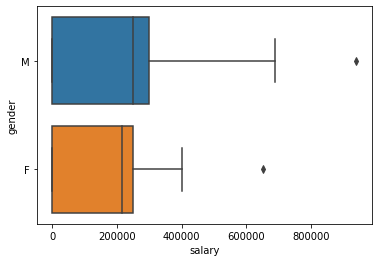

In [8]:
sns.boxplot('salary','gender', data=placement)

The average median salary of males are more than the females

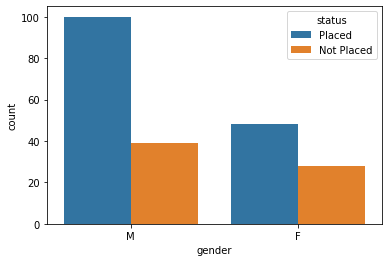

In [9]:
sns.countplot('gender', hue='status', data=placement)

In [10]:
placement.groupby('gender')['status'].value_counts(normalize=False)

gender  status    
F       Placed         48
        Not Placed     28
M       Placed        100
        Not Placed     39
Name: status, dtype: int64

Males get more placement and the number of unplaced females are approx 30 and unplaced males are approx 40

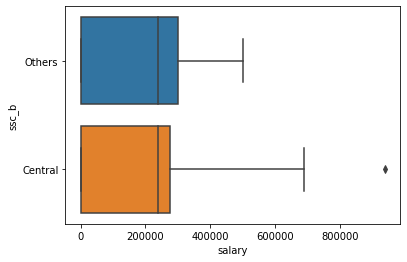

In [11]:
sns.boxplot('salary','ssc_b', data=placement)

The average median salary in terms of 10th board type looks to be the same, not much of a difference, even though outlier in central board

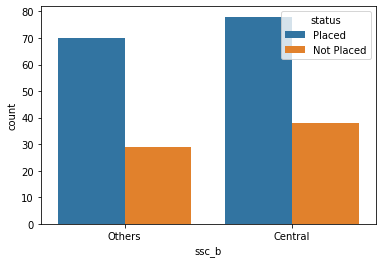

In [12]:
sns.countplot('ssc_b',hue='status', data=placement)

In [13]:
placement.groupby('ssc_b')['status'].value_counts(normalize=False)

ssc_b    status    
Central  Placed        78
         Not Placed    38
Others   Placed        70
         Not Placed    29
Name: status, dtype: int64

In terms of placement also, there is not much of difference, with Central board having a few more placements than others, hence this feature doesn't looks to be an important one in detrmining the placement status

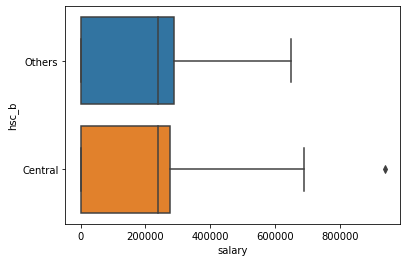

In [14]:
sns.boxplot('salary','hsc_b', data=placement)

In [15]:
placement.groupby('hsc_b')['status'].value_counts(normalize=False)

hsc_b    status    
Central  Placed        57
         Not Placed    27
Others   Placed        91
         Not Placed    40
Name: status, dtype: int64

The students having studied in other boards, have more percentage placement than the students studying in central board, however the average median salary doesn't seem to have much a difference with one outlier of dream job in case of central board

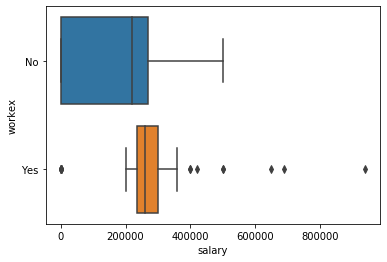

In [16]:
sns.boxplot('salary','workex', data=placement)

The students having prior workex have more median and the starting salary than people with no work experince and majority of the dream jobs land for the students having prior workex

In [17]:
placement.groupby('workex')['status'].value_counts(normalize=False)

workex  status    
No      Placed        84
        Not Placed    57
Yes     Placed        64
        Not Placed    10
Name: status, dtype: int64

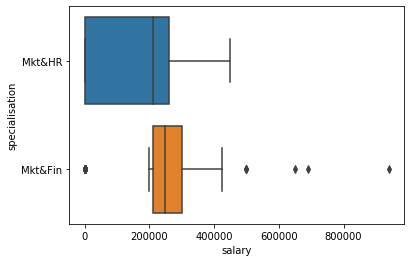

In [18]:
sns.boxplot('salary','specialisation', data=placement)

Same is the case with specialisation, students in Mkt and finance have more median and starting salaries than HR students

In [19]:
placement.groupby('specialisation')['status'].value_counts(normalize=False)

specialisation  status    
Mkt&Fin         Placed        95
                Not Placed    25
Mkt&HR          Placed        53
                Not Placed    42
Name: status, dtype: int64

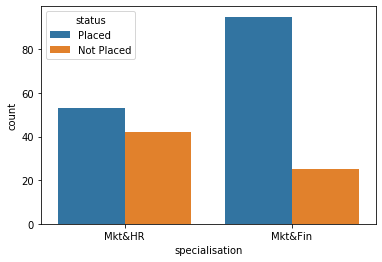

In [20]:
sns.countplot('specialisation', data=placement, hue='status')

This seems to be an important feature as majority of the students in Fin gets placed with high salary packages

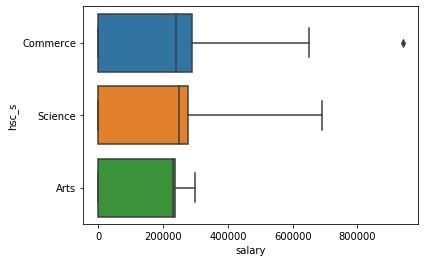

In [21]:
sns.boxplot('salary','hsc_s', data=placement)

In [22]:
placement.groupby('hsc_s')['status'].value_counts(normalize=False)

hsc_s     status    
Arts      Placed         6
          Not Placed     5
Commerce  Placed        79
          Not Placed    34
Science   Placed        63
          Not Placed    28
Name: status, dtype: int64

We have very less students for arts, hence cannot determine if this seems to be an important feature as it is an imbalanced datatset with less number of arts entrie

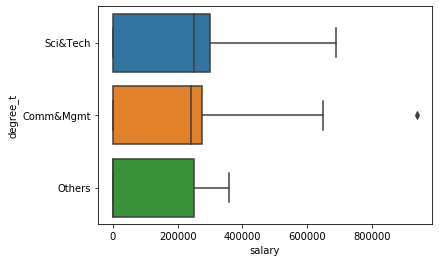

In [23]:
sns.boxplot('salary','degree_t', data=placement)

In [24]:
placement[placement['degree_t']=='Others']['salary'].median()

0.0

In [25]:
placement.groupby('degree_t')['status'].value_counts(normalize=False)

degree_t   status    
Comm&Mgmt  Placed        102
           Not Placed     43
Others     Not Placed      6
           Placed          5
Sci&Tech   Placed         41
           Not Placed     18
Name: status, dtype: int64

We have very less data for 'others' stream, hence cannot determine. However majority of the students in science and commerce stream do get place with median salary of science stream more than that of commerce stream

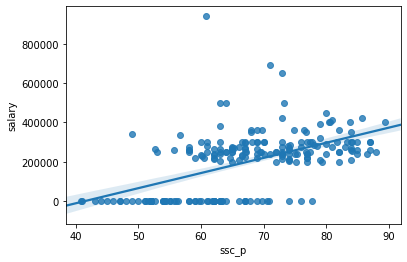

In [47]:
sns.regplot('ssc_p', 'salary', data=placement)

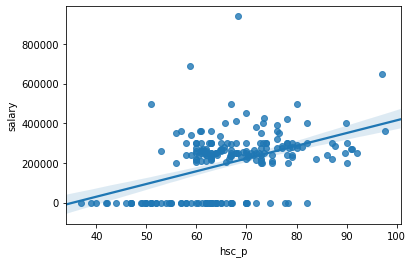

In [48]:
sns.regplot('hsc_p', 'salary', data=placement)

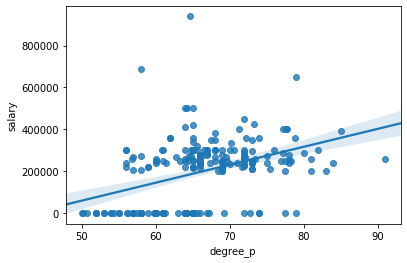

In [49]:
sns.regplot('degree_p', 'salary', data=placement)

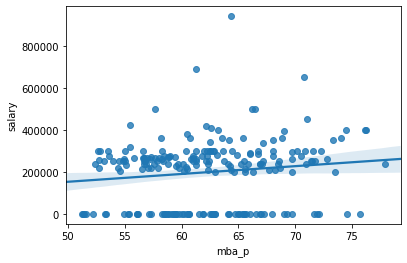

In [50]:
sns.regplot('mba_p', 'salary', data=placement)

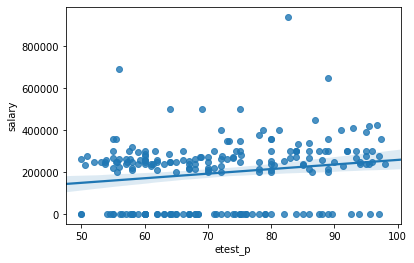

In [53]:
sns.regplot('etest_p', 'salary', data=placement)

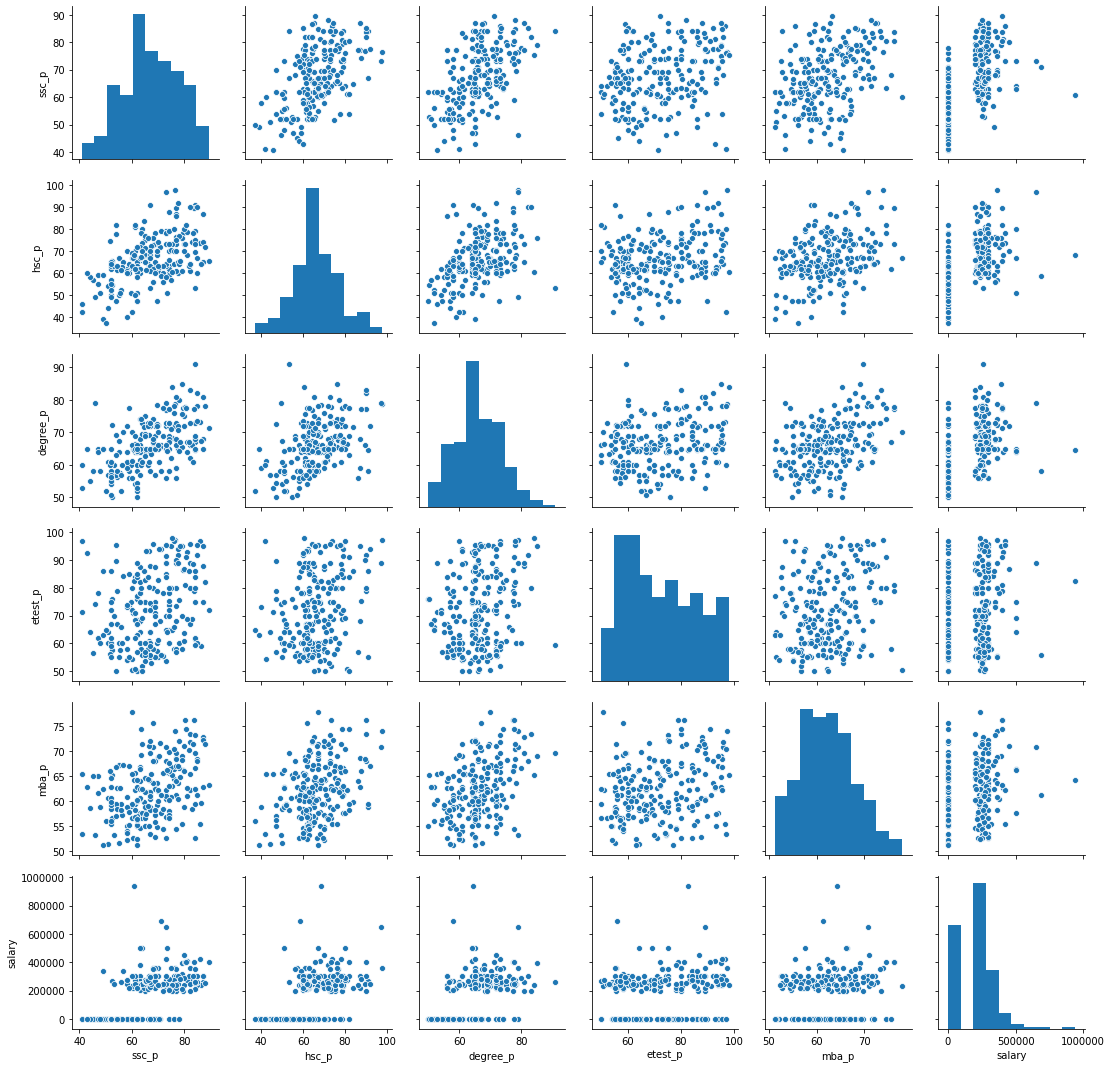

In [26]:
sns.pairplot(data=placement)

In [27]:
placement.corr()['salary'].sort_values(ascending=False)

salary     1.00
ssc_p      0.54
hsc_p      0.45
degree_p   0.41
etest_p    0.19
mba_p      0.14
Name: salary, dtype: float64

etst_p and mba_p doesn't seem to be pivotal in determining the stautus of getting placed or not, hence can be removed

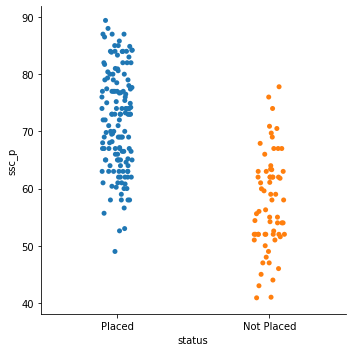

In [28]:
sns.catplot('status','ssc_p',data=placement)

Students having less than 55% do not get placed can be infered

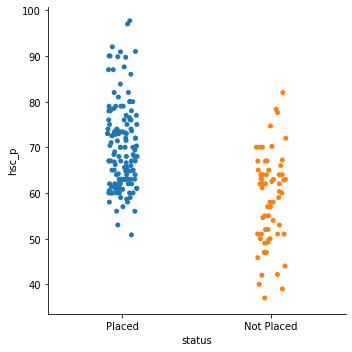

In [29]:
sns.catplot('status','hsc_p',data=placement)

Students having less than 55% do not get placed can be infered

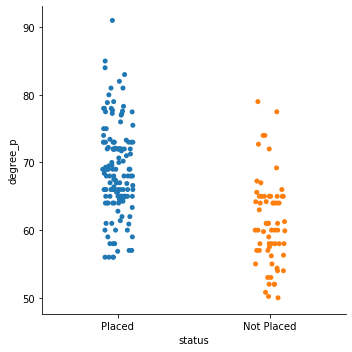

In [30]:
sns.catplot('status','degree_p',data=placement)

Students having less than 55% do not get placed can be infered

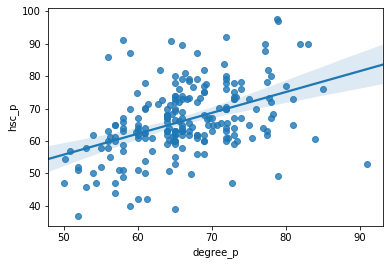

In [61]:
sns.regplot('degree_p', 'hsc_p', data=placement)

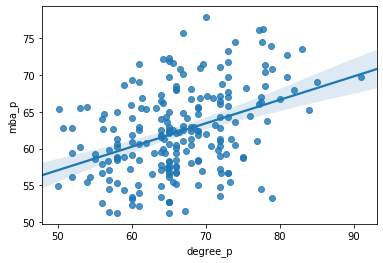

In [62]:
sns.regplot('degree_p', 'mba_p', data=placement)

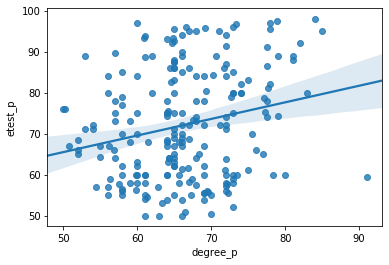

In [63]:
sns.regplot('degree_p', 'etest_p', data=placement)

In [31]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            215 non-null float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


# Feature Selection

In [34]:
columns = ['gender','specialisation','ssc_p','hsc_p','degree_p', 'workex','hsc_b','degree_t','salary','status']
final_df = placement[columns]
final_df.head()

,gender,specialisation,ssc_p,hsc_p,degree_p,workex,hsc_b,degree_t,salary,status
0,M,Mkt&HR,67.00,91.00,58.00,No,Others,Sci&Tech,270000.00,Placed
1,M,Mkt&Fin,79.33,78.33,77.48,Yes,Others,Sci&Tech,200000.00,Placed
2,M,Mkt&Fin,65.00,68.00,64.00,No,Central,Comm&Mgmt,250000.00,Placed
3,M,Mkt&HR,56.00,52.00,52.00,No,Central,Sci&Tech,0.00,Not Placed
4,M,Mkt&Fin,85.80,73.60,73.30,No,Central,Comm&Mgmt,425000.00,Placed


In [35]:
cat_coumns = []
for i in final_df.columns:
    if final_df[i].dtype ==object:
        cat_coumns.append(i)
cat_coumns

['gender', 'specialisation', 'workex', 'hsc_b', 'degree_t', 'status']

In [36]:
#dummy variables
dummy = pd.get_dummies(final_df[cat_coumns],drop_first=True)
dummy

,gender_M,specialisation_Mkt&HR,workex_Yes,hsc_b_Others,degree_t_Others,degree_t_Sci&Tech,status_Placed
0,1,1,0,1,0,1,1
1,1,0,1,1,0,1,1
2,1,0,0,0,0,0,1
3,1,1,0,0,0,1,0
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
210,1,0,0,1,0,0,1
211,1,0,0,1,0,1,1
212,1,0,1,1,0,0,1
213,0,1,0,1,0,0,1


In [37]:
final_df = pd.concat([final_df.drop(cat_coumns,axis=1),dummy],axis=1)
final_df.head()

,ssc_p,hsc_p,degree_p,salary,gender_M,specialisation_Mkt&HR,workex_Yes,hsc_b_Others,degree_t_Others,degree_t_Sci&Tech,status_Placed
0,67.00,91.00,58.00,270000.00,1,1,0,1,0,1,1
1,79.33,78.33,77.48,200000.00,1,0,1,1,0,1,1
2,65.00,68.00,64.00,250000.00,1,0,0,0,0,0,1
3,56.00,52.00,52.00,0.00,1,1,0,0,0,1,0
4,85.80,73.60,73.30,425000.00,1,0,0,0,0,0,1


# Standard Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['ssc_p','hsc_p','degree_p','salary']
final_df[columns_to_scale] = scaler.fit_transform(final_df[columns_to_scale])
final_df.head()

,ssc_p,hsc_p,degree_p,salary,gender_M,specialisation_Mkt&HR,workex_Yes,hsc_b_Others,degree_t_Others,degree_t_Sci&Tech,status_Placed
0,-0.03,2.27,-1.14,0.46,1,1,0,1,0,1,1
1,1.11,1.10,1.51,0.01,1,0,1,1,0,1,1
2,-0.21,0.15,-0.32,0.33,1,0,0,0,0,0,1
3,-1.05,-1.32,-1.96,-1.29,1,1,0,0,0,1,0
4,1.71,0.67,0.94,1.47,1,0,0,0,0,0,1


# Model Training

In [40]:
y = final_df['status_Placed']
X = final_df.drop('status_Placed',axis=1)

# RandomForestClassifier

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(n_estimators=400)
rf=rf.fit(X_train, y_train)

In [43]:
predictions = rf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        45

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [46]:
print(confusion_matrix(y_test, predictions))

[[20  0]
 [ 0 45]]


In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
print(accuracy)

1.0


# KNearestNeigbours

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,41):
    knn_classifier =KNeighborsClassifier(n_neighbors= i)
    score =cross_val_score(knn_classifier,X_train,y_train,cv=10)
    knn.append(score.mean())

Text(0.5, 1.0, 'Accuracy at respective K value')

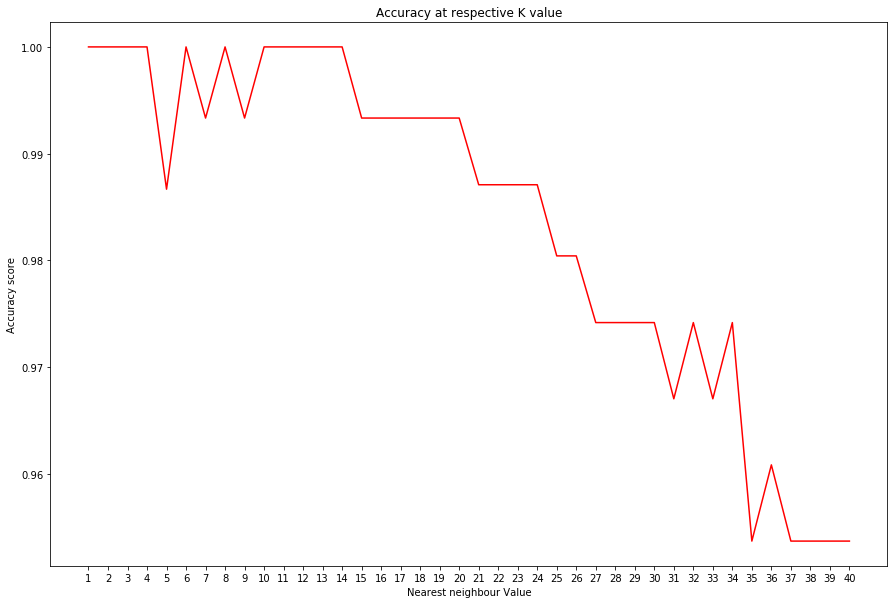

In [51]:
plt.figure(figsize=(15,10))
plt.plot([k for k in range(1,41)],knn,color='red' )
plt.xticks([k for k in range(1,41)])
plt.xlabel('Nearest neighbour Value')
plt.ylabel('Accuracy score')
plt.title('Accuracy at respective K value')

Maximum accuracy when k is between (10-14)

# DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier as DTC
model = DTC()
model.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(X_test)))

1.0


# Support Vector Classifer

In [53]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(X_test)))

1.0


C:\Users\320009177\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
